rundir /m12m_mass56000/mhdcv/
rundir /m12m_mass56000/mhdcv/
the_snapdir /home/tkc004//oasis/philruns///m12m_mass56000/mhdcv///output/
Nsnapstring 600
havecr 0
loading file : /home/tkc004//oasis/philruns///m12m_mass56000/mhdcv///output//snapdir_600/snapshot_600.0.hdf5
npart_file:  [1646993 2216968  619551       0  501900       0]
npart_total: [13523533 17621672  4399020        0  4201730        0]
flag_cooling 1
this time 1.0
hubble 0.702
loading file : /home/tkc004//oasis/philruns///m12m_mass56000/mhdcv///output//snapdir_600/snapshot_600.0.hdf5
npart_file:  [1646993 2216968  619551       0  501900       0]
npart_total: [13523533 17621672  4399020        0  4201730        0]
flag_cooling 1
atime 1.0
Lang [-3.24800331e+12 -1.76622993e+12 -1.53976887e+12]


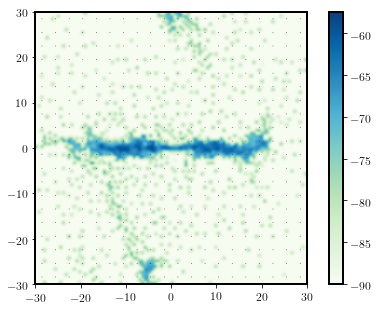

In [37]:
from samson_const import *
import matplotlib as mpl
from readsnap_cr import readsnapcr
import Sasha_functions as SF
import graphics_library as GL
import gas_temperature as GT
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from samson_functions import *
from crtestfunction import *
from matplotlib import rcParams
from pylab import *
from textwrap import wrap
from scipy.optimize import curve_fit
#rcParams['figure.figsize'] = 5, 5
rcParams['figure.figsize'] = 10, 5
rcParams['font.size']=12
rcParams['font.family']='serif'
rcParams['text.usetex']=True
#rcParams.update({'figure.autolayout': True})
import matplotlib.patches as patches
rcParams['axes.linewidth'] = 2
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
rcParams['ps.useafm'] = True
rcParams['pdf.use14corefonts'] = True
rcParams['axes.unicode_minus']=False
colortable = [ 'b', 'g', 'r']
#dirneed=['bwmwmr','bwmwmrdc27','bwmwmrdc28', 'bwmwmrdc29']
#dirneed=['bwmwmr']
#dirneed=['bwsmclrdc28']
#dirneed=['bwsmclrdc0']
#dirneed=['bwsbclrdc27']
#dirneed=['m12icr_b_70']
dirneed=['m12mmhdcv']
wanted='Bquiverxz'
Nsnap=600
the_prefix='snapshot'
the_suffix='.hdf5'


if wanted=='Bquiverxz' or wanted=='Bquiverxy' or wanted=='Vquiverxz' or wanted=='Vquiverxy':
        withinr=30
        maxlength=0.5
        needcontour=0
        rotface=1
        for runtodo in dirneed:
                snaplist=[]
                enclist=[]
                englist=[]
                enllist=[]
                endlist=[]
                enplist=[]
                enalist=[]
                avesfrl=[]
                prel=0
                preg=0
                prec=0
                pred=0
                prep=0
                presm = 0
                presnap = 0
                info=outdirname(runtodo, Nsnap)
                haveB=info['haveB']
                if haveB<1 and (wanted=='Bquiverxz' or wanted=='Bquiverxy'):
                        continue
                for i in [Nsnap]:
                        info=outdirname(runtodo, i)
                        rundir=info['rundir']
                        runtitle=info['runtitle']
                        slabel=info['slabel']
                        snlabel=info['snlabel']
                        dclabel=info['dclabel']
                        resolabel=info['resolabel']
                        the_snapdir=info['the_snapdir']
                        Nsnapstring=info['Nsnapstring']
                        havecr=info['havecr']
                        Fcal=info['Fcal']
                        iavesfr=info['iavesfr']
                        timestep=info['timestep']
                        maindir=info['maindir']
                        haveB=info['haveB']
                        snumadd=info['snumadd']
                        usepep=info['usepep']
                        halostr=info['halostr']
                        firever = info['firever']

                        print 'the_snapdir', the_snapdir
                        print 'Nsnapstring', Nsnapstring
                        print 'havecr', havecr
                        cosmo=info['cosmo']
                        if cosmo==1:
                                h0=1
                        else:
                                h0=0
                        header = readsnapcr(the_snapdir, Nsnapstring, 0, snapshot_name=the_prefix, extension=the_suffix, havecr=havecr,h0=h0,cosmological=cosmo, header_only=1)
                        ascale = header['time']
                        print 'this time', ascale
                        thisred = 1./ascale-1.
                        hubble = header['hubble']
                        print 'hubble', hubble
                        #test
                        #G = readsnapcr(the_snapdir, Nsnapstring, 4, snapshot_name=the_prefix, extension=the_suffix, havecr=havecr,h0=h0,cosmological=cosmo)

                        G = readsnapcr(the_snapdir, Nsnapstring, 0, snapshot_name=the_prefix, extension=the_suffix, havecr=havecr,h0=h0,cosmological=cosmo)
                        if cosmo==1:
                                if usepep==1:
                                        halosingle = SF.read_halo_history_pep(rundir, Nsnap, singlesnap=1, firever=firever,halonostr=halostr, hubble=hubble, comoving=0, maindir=maindir)
                                else:
                                        halosingle = SF.read_halo_history(rundir, halonostr=halostr,hubble=hubble, comoving=0, maindir=maindir, singlesnap=1, atime=ascale,snumadd=snumadd)
                                xcen = halosingle['x']
                                ycen = halosingle['y']
                                zcen = halosingle['z']
                                xvcen = halosingle['xv']
                                yvcen = halosingle['yv']
                                zvcen = halosingle['zv']
                                Rvirnow = halosingle['R']
                                MgAHF = halosingle['Mg']
                                Lxstar = halosingle['Lxstar']
                                Lystar = halosingle['Lystar']
                                Lzstar = halosingle['Lzstar']
                        else:
                                xcen=0
                                ycen=0
                                zcen=0
                                xvcen=0
                                yvcen=0
                                zvcen=0
                        Gpos = G['p']
                        Gvel = G['v']
                        Gx = Gpos[:,0]-xcen
                        Gy = Gpos[:,1]-ycen
                        Gz = Gpos[:,2]-zcen
                        Gr = np.sqrt(Gx*Gx+Gy*Gy+Gz*Gz)
                        Gvx = Gvel[:,0]-xvcen   #km/s
                        Gvy = Gvel[:,1]-yvcen
                        Gvz = Gvel[:,2]-zvcen
                        #Gvx = Gvel[:,0]   #km/s
                        #Gvy = Gvel[:,1]
                        #Gvz = Gvel[:,2]
                        Grho = G['rho']*1e10 #Msun/kpc^3
                        Gm = G['m']*1e10 #Msun
                        if rotface==1:
                                cutr = Gr < 5. #kpc
                                Gmcutr = Gm[cutr]; #to avoid overflow
                                Gxcutr = Gx[cutr]; Gycutr = Gy[cutr]; Gzcutr = Gz[cutr];
                                Gvxcutr = Gvx[cutr]; Gvycutr = Gvy[cutr]; Gvzcutr = Gvz[cutr];
                                Lang = [0.,0.,0.]
                                for i in range(len(Gxcutr)):
                                        Lang += Gmcutr[i]*np.cross([Gxcutr[i],Gycutr[i],Gzcutr[i]],[Gvxcutr[i],Gvycutr[i],Gvzcutr[i]])
                                print 'Lang', Lang
                                #test
                                Gx, Gy, Gz = SF.rotateL_to_z(Gx,Gy,Gz,Lang[0],Lang[1],Lang[2])
                                Gvx, Gvy, Gvz = SF.rotateL_to_z(Gvx,Gvy,Gvz,Lang[0],Lang[1],Lang[2])
                                #Gx, Gy, Gz = SF.rotateL_to_z(Gx,Gy,Gz,1,-Lxstar/Lystar,0)
                                #Gvx, Gvy, Gvz = SF.rotateL_to_z(Gvx,Gvy,Gvz,1,-Lxstar/Lystar,0)
                                #Gx, Gy, Gz = SF.rotateL_to_z(Gx,Gy,Gz,Lxstar,Lystar,Lzstar)
                                #Gvx, Gvy, Gvz = SF.rotateL_to_z(Gvx,Gvy,Gvz,Lxstar,Lystar,Lzstar)
                                #test angular momentum:
                        if wanted == 'Bquiverxy' or wanted == 'Vquiverxy' :
                                cutz = np.absolute(Gz)<maxlength
                        elif wanted == 'Bquiverxz' or wanted == 'Vquiverxz':
                                cutz = np.absolute(Gy)<maxlength
                        if haveB>0 and (wanted == 'Bquiverxy' or wanted == 'Bquiverxz'):
                                Bfield = G['B']
                                Bx = Bfield[:,0]
                                By = Bfield[:,1]
                                Bz = Bfield[:,2]
                                if rotface==1:
                                        Bx, By, Bz = SF.rotateL_to_z(Bx,By,Bz,Lang[0],Lang[1],Lang[2])
                        Gx=Gx[cutz]
                        Gy=Gy[cutz]
                        Gz=Gz[cutz]
                        Gvx=Gvx[cutz]
                        Gvy=Gvy[cutz]
                        Gvz=Gvz[cutz]
                        Gm=Gm[cutz]
                        Grho=Grho[cutz]
                        if haveB>0 and (wanted == 'Bquiverxy' or wanted == 'Bquiverxz'):
                                Bx = Bx[cutz]
                                By = By[cutz]
                                Bz = Bz[cutz]

                        if haveB>0 and (wanted == 'Bquiverxy' or wanted == 'Bquiverxz'):
                                B2 = Bx*Bx+By*By+Bz*Bz
                                Begy = B2/8./np.pi*Gm/Grho*kpc_in_cm*kpc_in_cm*kpc_in_cm
                                Bxvol = Bx*Gm/Grho*kpc_in_cm*kpc_in_cm*kpc_in_cm
                                Byvol = By*Gm/Grho*kpc_in_cm*kpc_in_cm*kpc_in_cm
                                Bzvol = Bz*Gm/Grho*kpc_in_cm*kpc_in_cm*kpc_in_cm
                        Vxm = Gvx*Gm
                        Vym = Gvy*Gm
                        Vzm = Gvz*Gm
                        V2m = np.sqrt(Gvx*Gvx+Gvy*Gvy+Gvz*Gvz)*Gm
                        cellvol = 2.0*withinr*2.0*withinr*2.0*maxlength/100./100.*kpc_in_cm*kpc_in_cm*kpc_in_cm

                if wanted=='Vquiverxy':
                        HmGm, xedges, yedges = np.histogram2d(Gy, Gx, bins=100,range=[[-withinr,withinr],[-withinr,withinr]], weights=np.absolute(Gm))
                        HmV2, xedges, yedges = np.histogram2d(Gy, Gx, bins=100,range=[[-withinr,withinr],[-withinr,withinr]], weights=np.absolute(V2m))
                        im=plt.imshow(np.log10(HmV2/HmGm)/2., interpolation='nearest', origin='lower',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
                if wanted=='Vquiverxz':
                        HmGm, xedges, yedges = np.histogram2d(Gz, Gx, bins=100,range=[[-withinr,withinr],[-withinr,withinr]], weights=np.absolute(Gm))
                        HmV2, xedges, yedges = np.histogram2d(Gz, Gx, bins=100,range=[[-withinr,withinr],[-withinr,withinr]], weights=np.absolute(V2m))

                        HV2=np.nan_to_num(HmV2/HmGm)+0.1
                        if needcontour==1:
                                im=plt.contourf(xedges[:-1],yedges[:-1], np.log10(HV2)/2., 30, cmap='GnBu')
                        else:
                                im=plt.imshow(np.log10(HmV2/HmGm+1e-2)/2., interpolation='bicubic', cmap='Oranges', origin='lower',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
                if wanted=='Bquiverxy':
                        HmB2, xedges, yedges = np.histogram2d(Gy, Gx, bins=100,range=[[-withinr,withinr],[-withinr,withinr]], weights=np.absolute(Begy/cellvol))
                        im=plt.imshow(np.log10(HmB2)/2., interpolation='nearest', origin='lower',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
                if wanted=='Bquiverxz':
                        HmB2, xedges, yedges = np.histogram2d(Gz, Gx, bins=100,range=[[-withinr,withinr],[-withinr,withinr]], weights=np.absolute(Begy/cellvol))
                        HmB2+=1e-18
                        if needcontour==1:
                                im=plt.contourf(xedges[:-1],yedges[:-1], np.log10(HmB2)/2., 20, cmap='GnBu',vmin=-10,vmax=-5.5)
                        else:
                                im=plt.imshow(np.log10(HmB2)/2., interpolation='bicubic', cmap='GnBu', origin='lower',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

                plt.colorbar(im,fraction=0.046, pad=0.04)

                if wanted=='Vquiverxy':
                        HmVx, xedges, yedges = np.histogram2d(Gy, Gx, bins=20,range=[[-withinr,withinr],[-withinr,withinr]], weights=Vxm)
                        HmVy, xedges, yedges = np.histogram2d(Gy, Gx, bins=20,range=[[-withinr,withinr],[-withinr,withinr]], weights=Vym)
                        HmVxy = np.sqrt(HmVx*HmVx+HmVy*HmVy)
                        U = HmVx/HmVxy
                        V = HmVy/HmVxy
                if wanted=='Vquiverxz':
                        HmVx, xedges, yedges = np.histogram2d(Gz, Gx, bins=20,range=[[-withinr,withinr],[-withinr,withinr]], weights=Vxm)
                        HmVy, xedges, yedges = np.histogram2d(Gz, Gx, bins=20,range=[[-withinr,withinr],[-withinr,withinr]], weights=Vzm)
                        HmGm, xedges, yedges = np.histogram2d(Gz, Gx, bins=20,range=[[-withinr,withinr],[-withinr,withinr]], weights=np.absolute(Gm))
                        HmVxy = np.sqrt(HmVx*HmVx+HmVy*HmVy)
                        U = HmVx/HmGm
                        V = HmVy/HmGm
                if wanted=='Bquiverxy':
                        HmBx, xedges, yedges = np.histogram2d(Gy, Gx, bins=20,range=[[-withinr,withinr],[-withinr,withinr]], weights=Bxvol/cellvol)
                        HmBy, xedges, yedges = np.histogram2d(Gy, Gx, bins=20,range=[[-withinr,withinr],[-withinr,withinr]], weights=Byvol/cellvol)
                        HmBxy = np.sqrt(HmBx*HmBx+HmBy*HmBy)
                        U = HmBx/1e6
                        V = HmBy/1e6
                if wanted=='Bquiverxz':
                        HmBx, xedges, yedges = np.histogram2d(Gz, Gx, bins=20,range=[[-withinr,withinr],[-withinr,withinr]], weights=Bxvol/cellvol)
                        HmBy, xedges, yedges = np.histogram2d(Gz, Gx, bins=20,range=[[-withinr,withinr],[-withinr,withinr]], weights=Bzvol/cellvol)
                        HmBxy = np.sqrt(HmBx*HmBx+HmBy*HmBy)
                        U = HmBx/1e6
                        V = HmBy/1e6
                X = (xedges[:-1]+xedges[1:])/2.
                Y = (yedges[:-1]+yedges[1:])/2.
                Q = plt.quiver(X, Y, U, V, scale_units='x',scale=25)
                if wanted=='Bquiverxy' or wanted=='Bquiverxz':
                        qk = plt.quiverkey(Q, 0.1, 0.95, 1e-6, r'$\mu {\rm G}$', labelpos='E',
                                   coordinates='figure')

                if wanted=='Vquiverxy' or wanted=='Vquiverxz':
                        qk = plt.quiverkey(Q, 0.1, 0.95, 1, '1 km/s', labelpos='E',
                                   coordinates='figure')
plt.show()

In [12]:
print np.log10(HmV2)/2.

[[-inf -inf -inf ... -inf -inf -inf]
 [-inf -inf -inf ... -inf -inf -inf]
 [-inf -inf -inf ... -inf -inf -inf]
 ...
 [-inf -inf -inf ... -inf -inf -inf]
 [-inf -inf -inf ... -inf -inf -inf]
 [-inf -inf -inf ... -inf -inf -inf]]


/oasis/tscc/scratch/tkc004/yt/yt-conda/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
